In [ ]:
!pip install xlrd


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Final Logistic Regression Model:
Intercept: [0.2370065]
Coefficients: [[ 0.02208276  0.26013542 -0.22901829  0.20773477 -0.16288383  0.04860814
   0.26490767 -0.11097132 -0.00672143 -0.01456994 -0.04775928 -0.11450042
   0.01344426  0.16342381 -0.10018426  0.12906846 -0.03565776  0.16187176
  -0.03353635 -0.01441443  0.18293473  0.16136958  0.04041536  0.08290304
  -0.22399911 -0.20152045  0.38059851  0.15217431 -0.07710984  0.17575921
   0.1262407  -0.00855915  0.21257362  0.00300083 -0.19085889 -0.07595142
   0.00606323  0.02538923 -0.14836668  0.15850776  0.39365096 -0.34012785
  -0.55575992 -0.08751577  0.40803366 -0.231005    0.14711222 -0.24360607
  -0.12859754 -0.21722018 -0.13026633  0.13653638 -0.09803298 -0.00941271
   0.33907609  0.0771095  -0.21566367  0.10678187 -0.35540886 -0.30162015
   0.25451751  0.27445532  0.49033102  0.54905857  0.03582367 -0.07851746
   0.03314842 -0.23361309 -0.28893566 -0.25021497  0.05653114  0.09983098
  -0.10215136 -0.24205665  0.16197328 -0.2

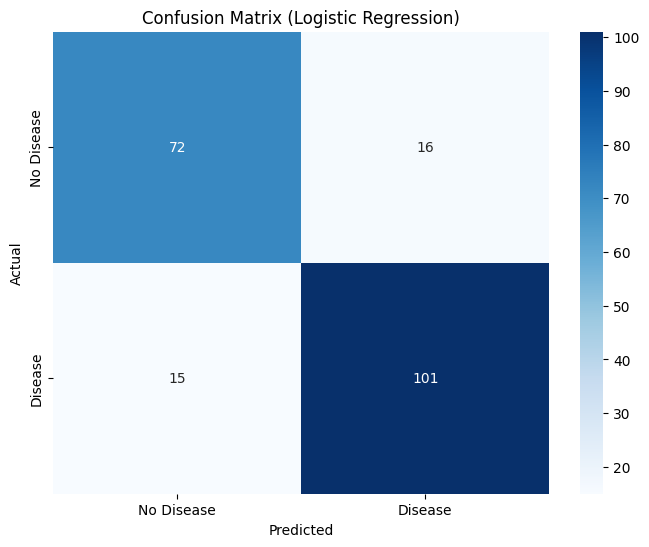

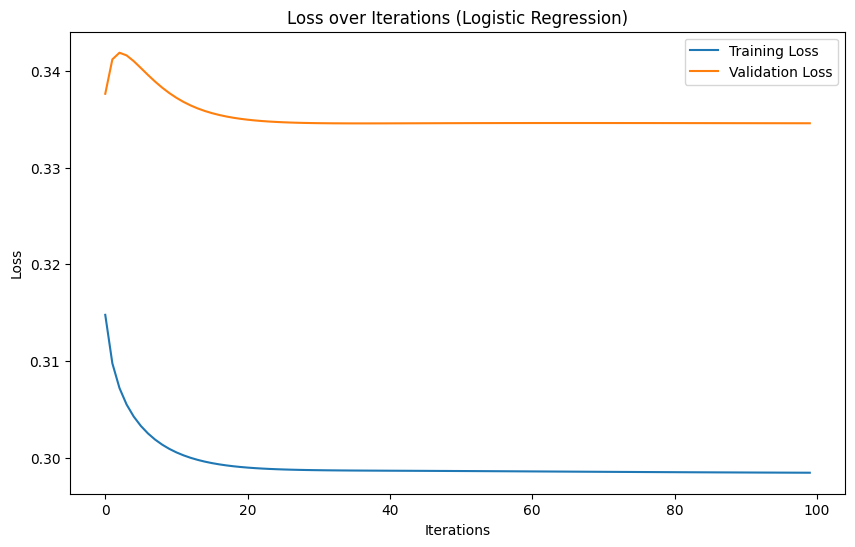

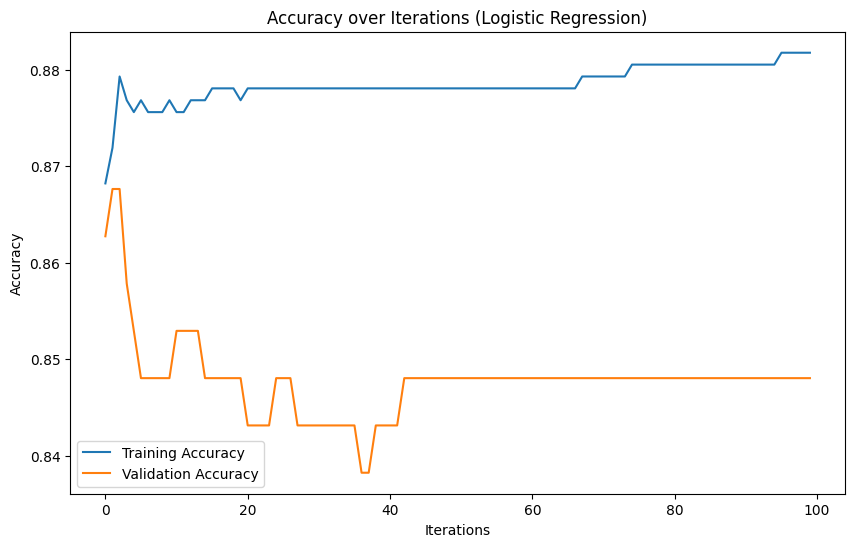

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the dataset, assuming it's actually a CSV file with an .xls extension
data = pd.read_csv('heart.xls')

# Data preprocessing
# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns with the mean of the column
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(data.drop(columns=['HeartDisease']))

# Standardize the features
scaler = StandardScaler()
X_poly = scaler.fit_transform(X_poly)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_poly, y = smote.fit_resample(X_poly, data['HeartDisease'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Define the logistic regression model with more iterations for convergence
logistic_regression_model = LogisticRegression(max_iter=1, solver='saga', C=0.1, random_state=42, warm_start=True)

# Custom training loop to record the loss and accuracy
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
n_iterations = 100

for i in range(n_iterations):
    logistic_regression_model.fit(X_train, y_train)

    # Calculate training loss
    train_probas = logistic_regression_model.predict_proba(X_train)
    train_loss = log_loss(y_train, train_probas)
    train_losses.append(train_loss)

    # Calculate training accuracy
    y_train_pred = logistic_regression_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate validation loss
    val_probas = logistic_regression_model.predict_proba(X_test)
    val_loss = log_loss(y_test, val_probas)
    val_losses.append(val_loss)

    # Calculate validation accuracy
    y_val_pred = logistic_regression_model.predict(X_test)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    val_accuracies.append(val_accuracy)

# Print the final model coefficients
print("Final Logistic Regression Model:")
print("Intercept:", logistic_regression_model.intercept_)
print("Coefficients:", logistic_regression_model.coef_)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Plot the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_losses, label='Training Loss')
plt.plot(range(n_iterations), val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations (Logistic Regression)')
plt.legend()
plt.show()

# Plot the accuracy over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), train_accuracies, label='Training Accuracy')
plt.plot(range(n_iterations), val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over Iterations (Logistic Regression)')
plt.legend()
plt.show()
